In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [3]:
# Load the CSV file into a DataFrame
file_path = "simulation_results.csv"
df = pd.read_csv(file_path)

In [4]:
df.shape

(1832, 6)

In [5]:
df.sample(10)

,Query ID,Query,Category,Technique,Description,Keywords
1529,160,Ways to cultivate a sense of belonging through...,Mindfulness and Meditation,Mindful Connection Exercise,This exercise can help cultivate a sense of be...,mindful connection exercise cultivating sense ...
222,23,Ways to cultivate joy in simple daily activities,Mindfulness and Meditation,Mindful Breathing,This is a simple yet effective method to bring...,mindful breathing cultivating daily activities...
1171,122,Practical ways to maintain a positive outlook ...,Mindfulness and Meditation,Loving-Kindness Meditation,This type of meditation is designed to promote...,loving-kindness meditation maintaining positiv...
626,66,How to cultivate curiosity to reduce stress,All,Cultivating an Open Mindset,Having an open mindset means being receptive t...,cultivating open mindset cultivating curiosity...
1197,125,How to find a sense of purpose through mindful...,All,Journaling,Journaling can be a powerful tool for self-dis...,journaling finding sense purpose through mindf...
463,49,Ways to improve your ability to listen mindfully,All,Practice Mindful Meditation,Mindfulness meditation can train your brain to...,practice mindful meditation improving your abi...
178,18,Practical ways to improve mental clarity throu...,Somatic Practices,Grounding Techniques,NaN,grounding techniques practical somatic practic...
1528,160,Ways to cultivate a sense of belonging through...,All,Mindful Social Interactions,Being present and fully engaged during your in...,mindful social interactions cultivating sense ...
1618,169,Tips for finding clarity during times of indec...,Mindfulness and Meditation,Mindfulness Meditation,This technique involves focusing your attentio...,mindfulness meditation gaining clarity through...
93,10,How to prioritize self-care without guilt,Mindfulness and Meditation,Mindfulness Meditation,This technique can help you stay present and f...,mindfulness meditation prioritizing self-care ...


In [6]:
df.isnull().sum()

Query ID        0
Query           0
Category        0
Technique       0
Description    18
Keywords        0
dtype: int64

In [72]:
df['Description'] = df['Description'].fillna("")

In [40]:
# Basic Statistics
def basic_statistics(df):
    print("\n--- Basic Statistics ---")
    print(f"Total rows: {len(df)}")
    print(f"Unique Queries: {df['Query'].nunique()}")
    print(f"Unique Categories: {df['Category'].nunique()}")
    print(f"Unique Techniques: {df['Technique'].nunique()}")
    print(f"Unique Keywords: {len(set(' '.join(df['Keywords']).split()))}")
    print(f"Average Description Length: {df['Description'].str.len().mean():.2f} characters")

In [221]:
# Distribution of Rows per Category
def category_distribution(df):
    print("\n--- Category Distribution ---")
    category_counts = df['Category'].value_counts()
    print(category_counts)
    
    plt.figure(figsize=(8, 5))
    category_counts.plot(kind='bar', color='#C1440E')
    plt.title("Distribution of Rows by Category", fontsize=14, color="#C1440E")
    plt.xlabel("Category", fontsize=12, color="#C1440E")
    plt.ylabel("Count", fontsize=12, color="#C1440E")
    
    # Set x-axis labels with newlines for better formatting
    ax = plt.gca()
    ax.set_xticklabels([label.replace(" ", "\n") for label in category_counts.index], rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [60]:
# Word Cloud for Keywords
def generate_wordcloud_keywords(df):
    print("\n--- Word Cloud for Keywords ---")
    all_keywords = ' '.join(df['Keywords'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keywords)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Keywords", fontsize=16)
    plt.show()

In [77]:
# Word Cloud for Queries
def generate_wordcloud_queries(df):
    print("\n--- Word Cloud for Keywords ---")
    all_keywords = ' '.join(df['Query'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keywords)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Queries", fontsize=16)
    plt.show()

In [78]:
# Word Cloud for Techniques
def generate_wordcloud_techniques(df):
    print("\n--- Word Cloud for Keywords ---")
    all_keywords = ' '.join(df['Technique'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keywords)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Techniques", fontsize=16)
    plt.show()

In [69]:
# Word Cloud for Descriptions
def generate_wordcloud_descriptions(df):
    print("\n--- Word Cloud for Keywords ---")
    all_keywords = ' '.join(df['Description'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keywords)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Descriptions", fontsize=16)
    plt.show()

In [43]:
# Diversity of Recommendations
def estimate_diversity(df):
    print("\n--- Diversity of Recommendations ---")
    unique_techniques = df['Technique'].nunique()
    unique_descriptions = df['Description'].nunique()
    total_rows = len(df)
    
    technique_diversity = unique_techniques / total_rows
    description_diversity = unique_descriptions / total_rows
    
    print(f"Unique Techniques: {unique_techniques}")
    print(f"Unique Descriptions: {unique_descriptions}")
    print(f"Technique Diversity: {technique_diversity:.2%}")
    print(f"Description Diversity: {description_diversity:.2%}")

In [223]:
# Length Analysis
def length_analysis(df):
    print("\n--- Length Analysis ---")
    df['Description Length'] = df['Description'].str.len()
    df['Keywords Length'] = df['Keywords'].str.split().apply(len)
    
    plt.figure(figsize=(8, 5))
    plt.hist(df['Description Length'], bins=20, color='#A63A1E', alpha=0.7)
    plt.title("Distribution of Description Lengths", fontsize=14, color="#C1440E")
    plt.xlabel("Description Length (characters)", fontsize=12, color="#C1440E")
    plt.ylabel("Frequency", fontsize=12, color="#C1440E")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.hist(df['Keywords Length'], bins=20, color='#847F5A', alpha=0.7)
    plt.title("Distribution of Keywords Lengths")
    plt.xlabel("Number of Keywords")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [106]:
# Relationship Analysis
def relationship_analysis(df):
    print("\n--- Relationship Analysis ---")
    pivot_table = df.pivot_table(index='Category', values='Technique', aggfunc='nunique')
    print(pivot_table)
    category_counts = df['Category'].value_counts()
    
    plt.figure(figsize=(8, 5))
    pivot_table.plot(kind='bar', legend=False, color='#C1440E')
    plt.title("Number of Unique Techniques per Category")
    plt.xlabel("Category")
    plt.ylabel("Unique Techniques")
    ax = plt.gca()
    ax.set_xticklabels([label.replace(" ", "\n") for label in category_counts.index], rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [249]:
def relationship_analysis_keywords(df):
    print("\n--- Relationship Analysis for Keywords ---")
    
    # Create a pivot table for unique keyword counts by category
    pivot_table = df.pivot_table(index="Category", values="Keywords", aggfunc=lambda x: len(set(" ".join(x.dropna()).split())))
    print(pivot_table)
    
    # Count the number of entries per category
    category_counts = df["Category"].value_counts()
    
    # Plot the number of unique keywords per category
    plt.figure(figsize=(8, 5))
    pivot_table.plot(kind="bar", legend=False, color="#C1440E")
    plt.title("Number of Unique Keywords per Category", fontsize=14, color="#C1440E")
    plt.xlabel("Category", fontsize=12, color="#C1440E")
    plt.ylabel("Unique Keywords", fontsize=12, color="#C1440E")
    ax = plt.gca()
    ax.set_xticklabels([label.replace(" ", "\n") for label in category_counts.index], rotation=45)
    plt.tight_layout()
    plt.show()

In [251]:
def relationship_analysis_queries(df):
    print("\n--- Relationship Analysis for Queries ---")
    
    # Create a pivot table for unique query counts by category
    pivot_table = df.pivot_table(
        index="Category",
        values="Query",  # Replace with the actual column name for queries
        aggfunc=lambda x: len(set(x.dropna()))  # Count unique queries
    )
    print(pivot_table)
    
    # Count the number of entries per category
    category_counts = df["Category"].value_counts()
    
    # Plot the number of unique queries per category
    plt.figure(figsize=(8, 5))
    pivot_table.plot(kind="bar", legend=False, color="#C1440E")
    plt.title("Number of Unique Queries per Category", fontsize=14, color="#C1440E")
    plt.xlabel("Category", fontsize=12, color="#C1440E")
    plt.ylabel("Unique Queries", fontsize=12, color="#C1440E")
    ax = plt.gca()
    ax.set_xticklabels([label.replace(" ", "\n") for label in category_counts.index], rotation=45)
    plt.tight_layout()
    plt.show()

In [252]:
basic_statistics(df)


--- Basic Statistics ---
Total rows: 1832
Unique Queries: 190
Unique Categories: 4
Unique Techniques: 612
Unique Keywords: 739
Average Description Length: 205.34 characters



--- Category Distribution ---
Category
All                           534
Mindfulness and Meditation    449
Breathing Exercises           432
Somatic Practices             417
Name: count, dtype: int64


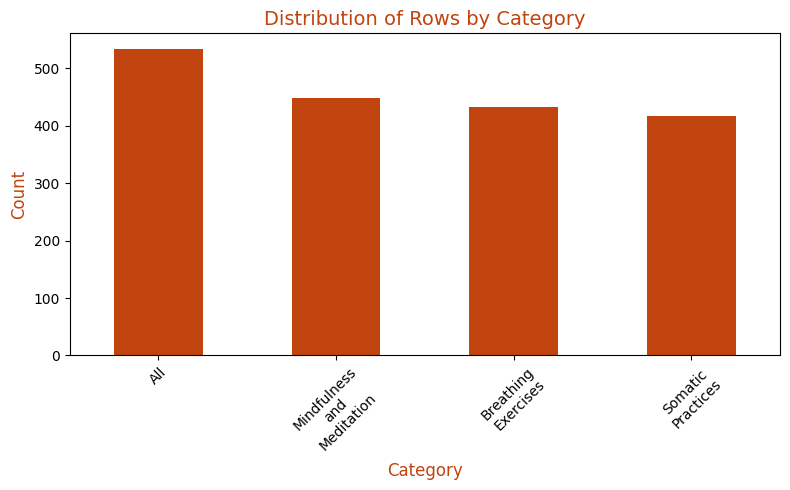

In [222]:
category_distribution(df)


--- Word Cloud for Keywords ---


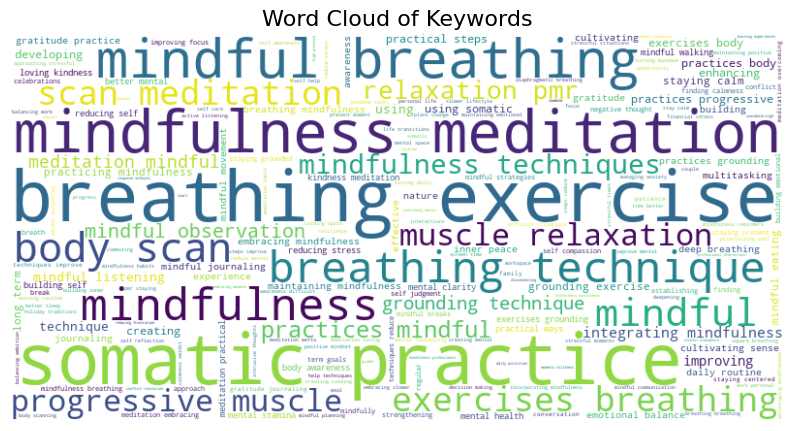

In [64]:
generate_wordcloud_keywords(df)


--- Word Cloud for Keywords ---


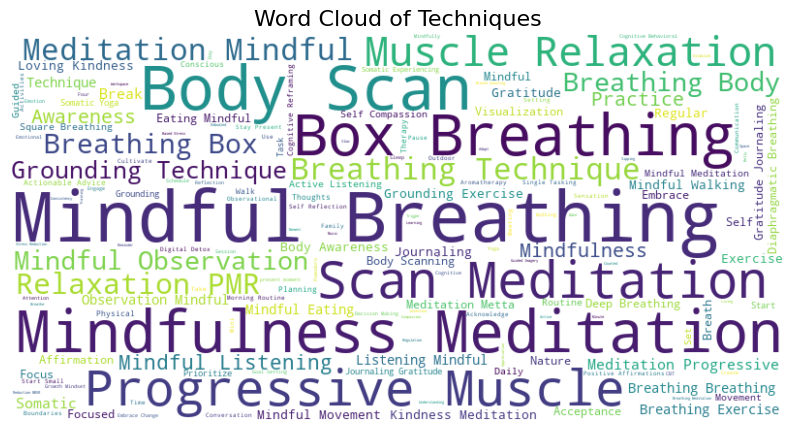

In [63]:
generate_wordcloud_techniques(df)


--- Word Cloud for Keywords ---


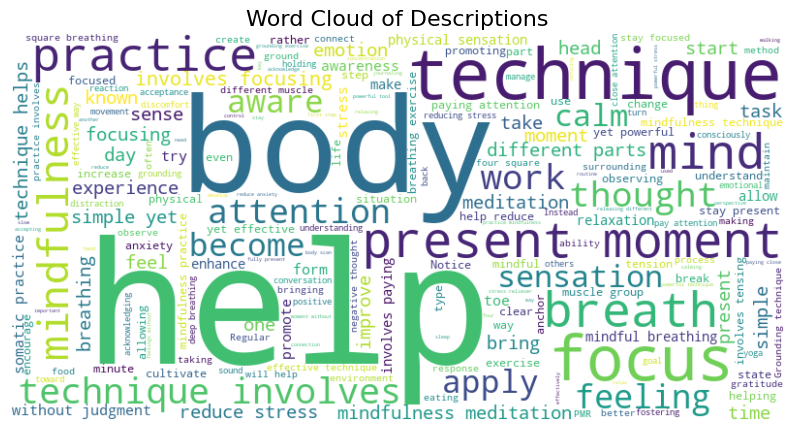

In [74]:
generate_wordcloud_descriptions(df)


--- Word Cloud for Keywords ---


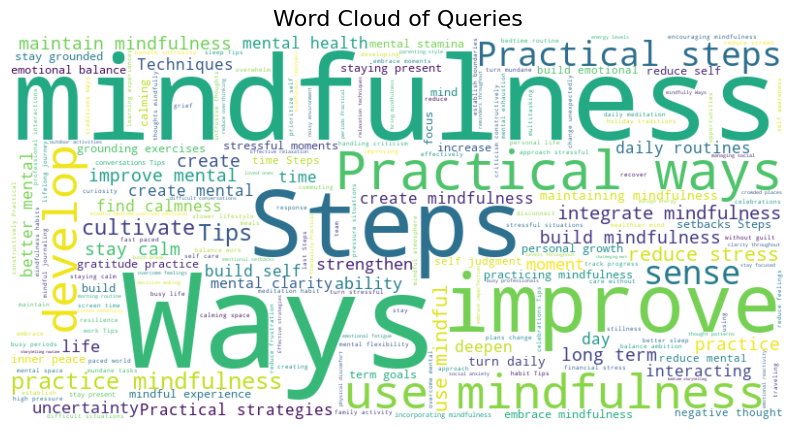

In [79]:
generate_wordcloud_queries(df)

In [80]:
estimate_diversity(df)


--- Diversity of Recommendations ---
Unique Techniques: 612
Unique Descriptions: 1814
Technique Diversity: 33.41%
Description Diversity: 99.02%



--- Length Analysis ---


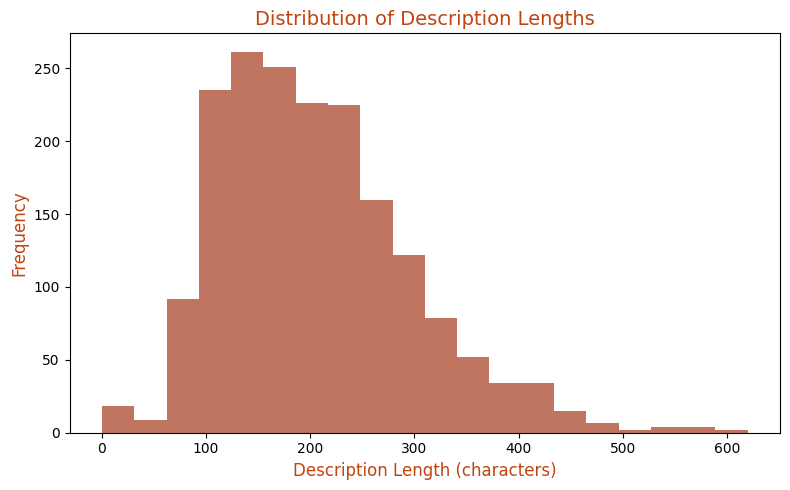

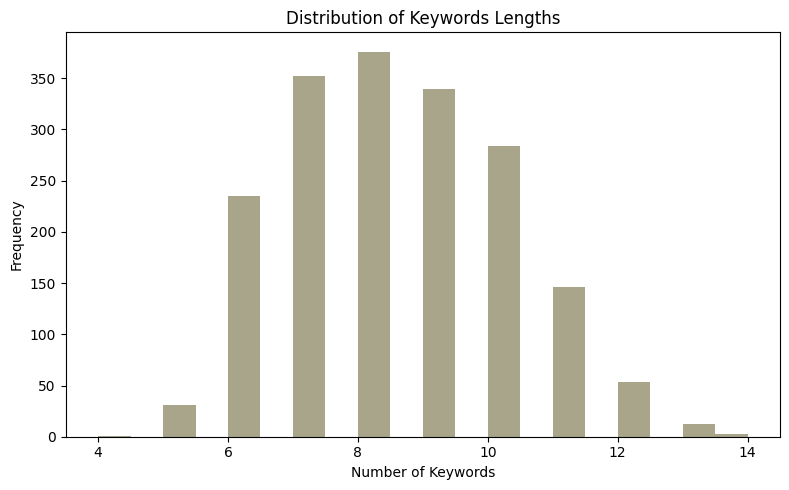

In [224]:
length_analysis(df)


--- Relationship Analysis ---
                            Technique
Category                             
All                               239
Breathing Exercises               162
Mindfulness and Meditation        181
Somatic Practices                 122


<Figure size 800x500 with 0 Axes>

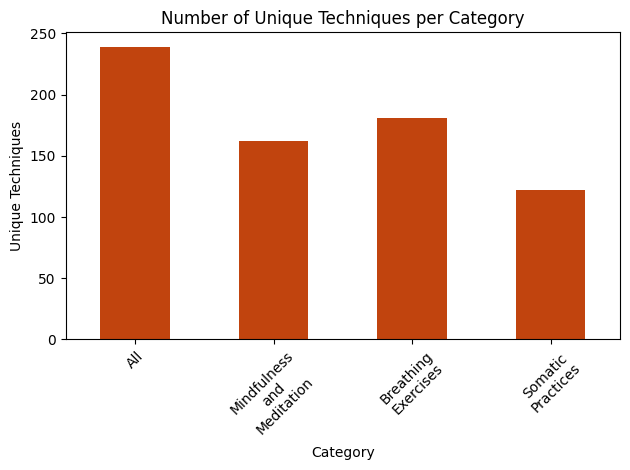

In [247]:
relationship_analysis(df)


--- Relationship Analysis for Keywords ---
                            Keywords
Category                            
All                              522
Breathing Exercises              436
Mindfulness and Meditation       459
Somatic Practices                421


<Figure size 800x500 with 0 Axes>

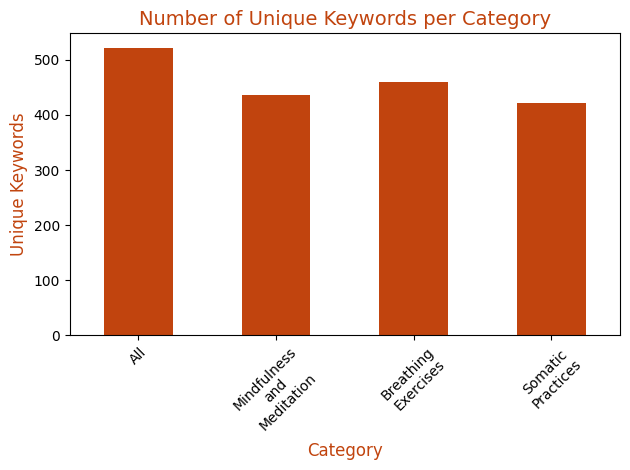

In [250]:
relationship_analysis_keywords(df)


--- Relationship Analysis for Queries ---
                            Query
Category                         
All                           190
Breathing Exercises           189
Mindfulness and Meditation    190
Somatic Practices             190


<Figure size 800x500 with 0 Axes>

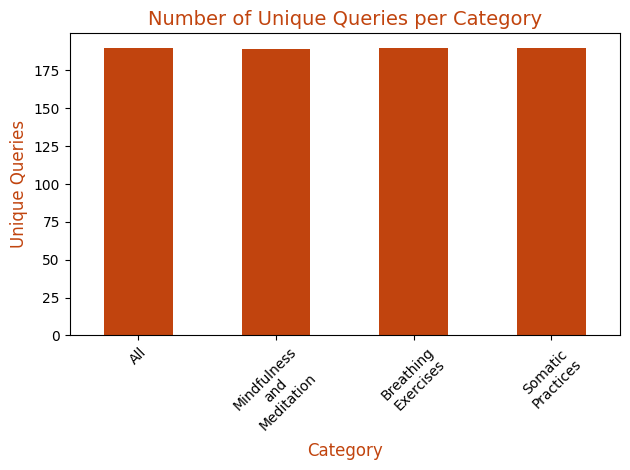

In [253]:
relationship_analysis_queries(df)

Comparing Technique Distribution in "All" vs selected categories

In [117]:
df_all = df[df["Category"] == "All"]
df_specific = df[df["Category"] != "All"]

In [118]:
# Count unique techniques in each category
technique_counts = df.groupby("Category")["Technique"].nunique().reset_index()

C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\2112199724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=technique_counts, x="Category", y="Technique", palette=warm_palette)
C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\2112199724.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=technique_counts, x="Category", y="Technique", palette=warm_palette)
C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\2112199724.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace(" ", "\n") for label in technique_counts["Category"]], rotation=45)


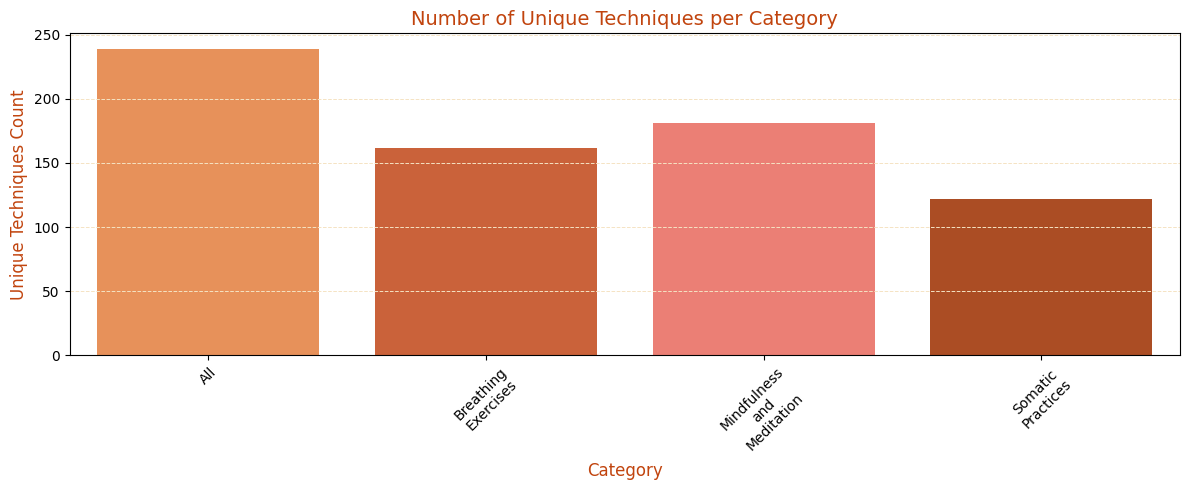

In [120]:
# Define a warm-orangy-red palette
warm_palette = ['#FF8C42', '#E25822', '#FF6F61', '#C1440E', '#D67D3E']

# Plot technique distribution
plt.figure(figsize=(12, 5))
sns.barplot(data=technique_counts, x="Category", y="Technique", palette=warm_palette)
plt.title("Number of Unique Techniques per Category", fontsize=14, color="#C1440E")
plt.xlabel("Category", fontsize=12, color="#C1440E")
plt.ylabel("Unique Techniques Count", fontsize=12, color="#C1440E")

# Format x-axis labels for better readability
ax = plt.gca()
ax.set_xticklabels([label.replace(" ", "\n") for label in technique_counts["Category"]], rotation=45)

# Adjust layout and gridlines
plt.grid(axis='y', linestyle='--', color='#F5E3C3', linewidth=0.7)  # Add soft gridlines
plt.tight_layout()
plt.show()

Insights: Selecting a category seamsn to lead to more specific technique recommendations.

Analysing Keyword Overlap between "All" and the other categories

In [121]:
# Extract unique keywords for "All" and category-specific responses
keywords_all = set(" ".join(df_all["Keywords"].dropna()).split())
keywords_specific = set(" ".join(df_specific["Keywords"].dropna()).split())

In [122]:
# Compute overlap
common_keywords = keywords_all.intersection(keywords_specific)
unique_to_all = keywords_all - keywords_specific
unique_to_specific = keywords_specific - keywords_all

In [123]:
print(f"Total Keywords in 'All': {len(keywords_all)}")
print(f"Total Keywords in Specific Categories: {len(keywords_specific)}")
print(f"Common Keywords: {len(common_keywords)}")
print(f"Unique to 'All': {len(unique_to_all)}")
print(f"Unique to Specific Categories: {len(unique_to_specific)}")

Total Keywords in 'All': 522
Total Keywords in Specific Categories: 627
Common Keywords: 410
Unique to 'All': 112
Unique to Specific Categories: 217


Comparing Description Lengths

In [124]:
# Calculate description lengths
df["Description Length"] = df["Description"].apply(lambda x: len(str(x).split()))

C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\2901799494.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


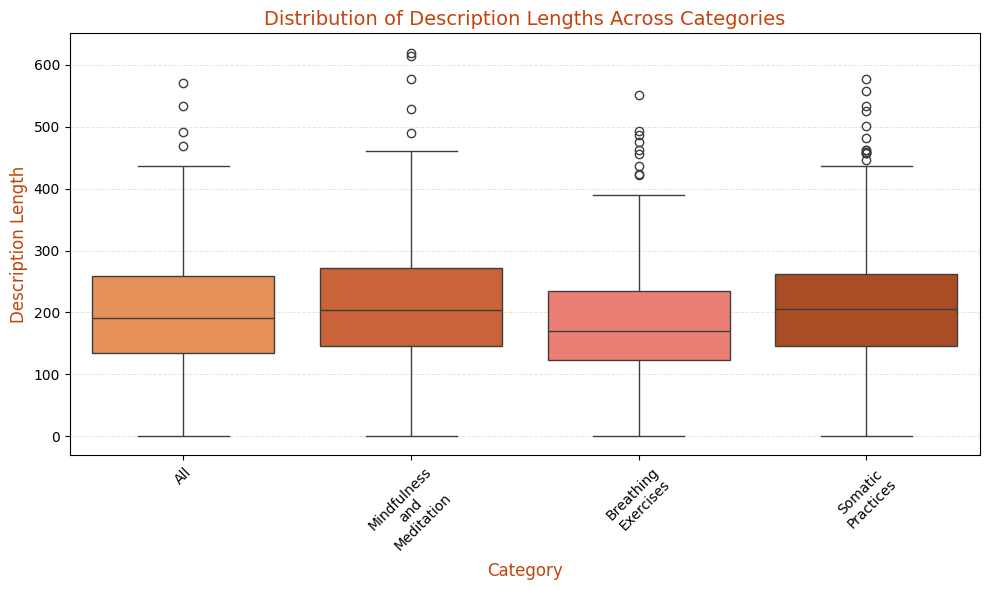

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the palette to match the number of unique categories
unique_categories = df["Category"].nunique()
adjusted_palette = warm_palette[:unique_categories]

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Category",
    y="Description Length",
    palette=adjusted_palette
)

plt.title("Distribution of Description Lengths Across Categories", fontsize=14, color="#C1440E")
plt.xlabel("Category", fontsize=12, color="#C1440E")
plt.ylabel("Description Length", fontsize=12, color="#C1440E")

categories = df["Category"].unique()

# Ensure correct x-tick formatting
ax = plt.gca()
ax.set_xticks(range(len(df["Category"].unique())))  # Define the ticks
ax.set_xticklabels([label.replace(" ", "\n") for label in categories], rotation=45)

# Fix the gridline color
plt.grid(axis='y', linestyle='--', color='#F5E3C3', linewidth=0.7)
plt.tight_layout()
plt.show()


Insight: Category-specific responses are not longer nor more detailed.

In [264]:
max_description_length_per_category = df.groupby("Category")["Description Length"].max()

In [265]:
max_description_length_per_category

Category
All                           571
Breathing Exercises           552
Mindfulness and Meditation    620
Somatic Practices             578
Name: Description Length, dtype: int64

Measuring Techniques' Similarity Between "All" and Other Categories

In [197]:
df_all.Category.unique()

array(['All'], dtype=object)

In [184]:
# Combine descriptions by category
all_techniques = df_all["Technique"].dropna().tolist()  # List of individual techniques
category_techniques = df_specific[["Category", "Technique"]].dropna()  # Keep individual rows

In [185]:
category_techniques

,Category,Technique
3,Mindfulness and Meditation,Mindful Eating
4,Mindfulness and Meditation,Mindful Walking
5,Mindfulness and Meditation,Breathing Exercises
6,Breathing Exercises,Incorporate Mindful Breathing into Daily Activ...
7,Breathing Exercises,4-7-8 Breathing Technique
...,...,...
1827,Breathing Exercises,Diaphragmatic Breathing
1828,Breathing Exercises,Box Breathing
1829,Somatic Practices,Adopt a Mindful Mindset
1830,Somatic Practices,Body Scan Meditation


In [256]:
# Compute TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words="english")

In [186]:
all_entries = all_techniques + category_techniques["Technique"].tolist()

In [188]:
tfidf_matrix = vectorizer.fit_transform(all_entries)

In [189]:
num_all = len(all_techniques)
cosine_similarities = cosine_similarity(tfidf_matrix[:num_all], tfidf_matrix[num_all:])

In [190]:
category_techniques["Cosine Similarity to 'All'"] = cosine_similarities.mean(axis=0)

C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\1825937718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\1825937718.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\1825937718.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace(" ", "\n") for label in category_texts["Category"]], rotation=45)


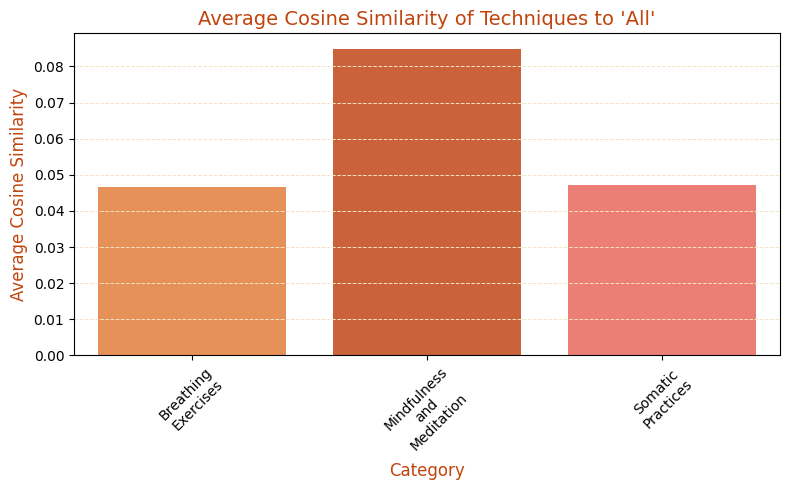

In [201]:
avg_similarity_by_category = category_techniques.groupby("Category")["Cosine Similarity to 'All'"].mean()
warm_palette = ['#FF8C42', '#E25822', '#FF6F61', '#C1440E', '#D67D3E']
# Bar plot for average similarity using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    x=avg_similarity_by_category.index,
    y=avg_similarity_by_category.values,
    palette=warm_palette  # Use the warm orangy-red palette
)
plt.title("Average Cosine Similarity of Techniques to 'All'", fontsize=14, color="#C1440E")
plt.xlabel("Category", fontsize=12, color="#C1440E")
plt.ylabel("Average Cosine Similarity", fontsize=12, color="#C1440E")
# Format x-axis labels for better readability
ax = plt.gca()
ax.set_xticklabels([label.replace(" ", "\n") for label in category_texts["Category"]], rotation=45)
# Adjust layout and gridlines
plt.grid(axis='y', linestyle='--', color='#F5E3C3', linewidth=0.7)  # Add soft gridlines
plt.tight_layout()
plt.show()

In [192]:
category_techniques

,Category,Technique,Cosine Similarity to 'All'
3,Mindfulness and Meditation,Mindful Eating,0.075010
4,Mindfulness and Meditation,Mindful Walking,0.061410
5,Mindfulness and Meditation,Breathing Exercises,0.026318
6,Breathing Exercises,Incorporate Mindful Breathing into Daily Activ...,0.038050
7,Breathing Exercises,4-7-8 Breathing Technique,0.048252
...,...,...,...
1827,Breathing Exercises,Diaphragmatic Breathing,0.022886
1828,Breathing Exercises,Box Breathing,0.033435
1829,Somatic Practices,Adopt a Mindful Mindset,0.034367
1830,Somatic Practices,Body Scan Meditation,0.086730


In [202]:
category_stats = category_techniques.groupby("Category")["Cosine Similarity to 'All'"].describe()

In [229]:
category_stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Breathing Exercises,432.0,0.046514,0.038017,0.0,0.022886,0.033435,0.048927,0.140782
Mindfulness and Meditation,449.0,0.084897,0.052397,0.0,0.039968,0.086730,0.135546,0.179272
Somatic Practices,417.0,0.047220,0.036134,0.0,0.014066,0.044512,0.074217,0.135546


In [231]:
similarity_by_category = {
    category: group["Cosine Similarity to 'All'"].values
    for category, group in category_techniques.groupby("Category")
}

# Perform ANOVA
try:
    anova_result = f_oneway(*similarity_by_category.values())
    anova_f_statistic = anova_result.statistic
    anova_p_value = anova_result.pvalue
except ValueError:
    anova_p_value = "N/A (insufficient data)"

In [233]:
print(f"ANOVA F-statistic: {anova_f_statistic:.4f}")
print(f"ANOVA p-value: {anova_p_value}")

ANOVA F-statistic: 114.8500
ANOVA p-value: 1.2099542156544275e-46


In [206]:
kruskal_result = kruskal(*similarity_by_category.values())
kruskal_p_value = kruskal_result.pvalue

In [207]:
kruskal_p_value

2.0401819560853653e-39

In [208]:
# Pairwise comparisons between categories
pairwise_results = []
categories = list(similarity_by_category.keys())

for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        cat1, cat2 = categories[i], categories[j]
        values1, values2 = similarity_by_category[cat1], similarity_by_category[cat2]
        
        # Perform t-test and Mann-Whitney U test
        t_test = ttest_ind(values1, values2, equal_var=False)
        mw_test = mannwhitneyu(values1, values2, alternative="two-sided")
        
        pairwise_results.append({
            "Category 1": cat1,
            "Category 2": cat2,
            "T-Test p-value": t_test.pvalue,
            "Mann-Whitney p-value": mw_test.pvalue
        })

In [209]:
pairwise_results

[{'Category 1': 'Breathing Exercises',
  'Category 2': 'Mindfulness and Meditation',
  'T-Test p-value': 7.68300226214524e-33,
  'Mann-Whitney p-value': 3.4334472454264396e-33},
 {'Category 1': 'Breathing Exercises',
  'Category 2': 'Somatic Practices',
  'T-Test p-value': 0.7816555842809114,
  'Mann-Whitney p-value': 0.8149217573116115},
 {'Category 1': 'Mindfulness and Meditation',
  'Category 2': 'Somatic Practices',
  'T-Test p-value': 2.231497283109656e-32,
  'Mann-Whitney p-value': 4.246672101523198e-28}]

C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\2107368737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=category_techniques, x="Category", y="Cosine Similarity to 'All'", palette=adjusted_palette)
C:\Users\anacs\AppData\Local\Temp\ipykernel_35404\2107368737.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace(" ", "\n") for label in categories], rotation=45)


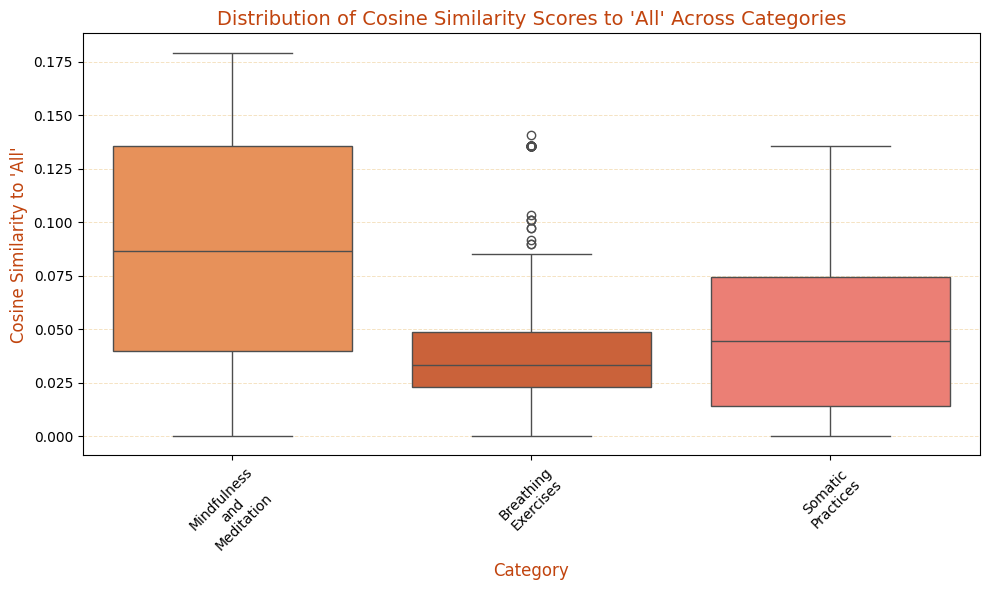

In [243]:
warm_palette = ['#FF8C42', '#E25822', '#FF6F61', '#C1440E', '#D67D3E']
adjusted_palette = warm_palette[:3]
# Box plot to visualize cosine similarity scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=category_techniques, x="Category", y="Cosine Similarity to 'All'", palette=adjusted_palette)
plt.title("Distribution of Cosine Similarity Scores to 'All' Across Categories", fontsize=14, color="#C1440E")
plt.xlabel("Category", fontsize=12, color="#C1440E")
plt.ylabel("Cosine Similarity to 'All'", fontsize=12, color="#C1440E")
# Format x-axis labels for better readability
ax = plt.gca()
categories = category_techniques["Category"].unique()
ax.set_xticklabels([label.replace(" ", "\n") for label in categories], rotation=45)
# Adjust layout and gridlines
plt.grid(axis='y', linestyle='--', color='#F5E3C3', linewidth=0.7)  # Add soft gridlines
plt.tight_layout()
plt.show()

Insight:  Category-specific generated techniques are not similar to "All" (low cosine similarity), so selecting a category significantly impacts the generated responses.